In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(columns=['day','month','year'], inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
not fire           2
fire               2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [11]:
## Independent & Dependent Features
X = df.drop('FWI', axis=1)
y = df['FWI']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [14]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

In [15]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [16]:
## Feature Selection based on corr
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.624417,-0.199892,-0.300602,0.678151,0.464421,0.387681,0.591686,0.448341,0.551003,0.225154
RH,-0.624417,1.000000,0.205580,0.230196,-0.659662,-0.392032,-0.222566,-0.674144,-0.340929,-0.454754,-0.389891
Ws,-0.199892,0.205580,1.000000,0.125751,-0.107067,0.060682,0.124498,0.091270,0.089491,-0.013671,-0.155567
Rain,-0.300602,0.230196,0.125751,1.000000,-0.523014,-0.272716,-0.287076,-0.328959,-0.284647,-0.344127,-0.037944
FFMC,0.678151,-0.659662,-0.107067,-0.523014,1.000000,0.601921,0.513651,0.731990,0.592242,0.759064,0.174517
DMC,0.464421,-0.392032,0.060682,-0.272716,0.601921,1.000000,0.880224,0.674601,0.982472,0.599156,0.150552
DC,0.387681,-0.222566,0.124498,-0.287076,0.513651,0.880224,1.000000,0.507366,0.943430,0.525402,-0.100043
ISI,0.591686,-0.674144,0.091270,-0.328959,0.731990,0.674601,0.507366,1.000000,0.639550,0.735801,0.233031
BUI,0.448341,-0.340929,0.089491,-0.284647,0.592242,0.982472,0.943430,0.639550,1.000000,0.601647,0.051998
Classes,0.551003,-0.454754,-0.013671,-0.344127,0.759064,0.599156,0.525402,0.735801,0.601647,1.000000,0.122094


## Feature Selection

<AxesSubplot:>

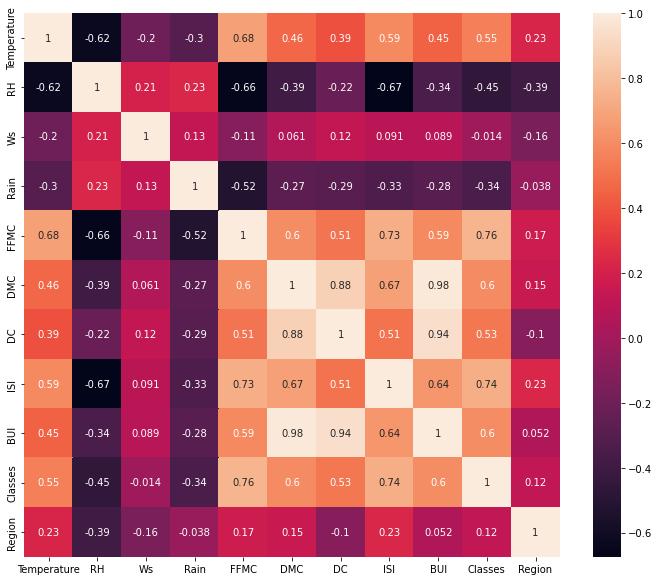

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(), annot=True)

In [18]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [19]:
## threshold--Domain expertise
corr_features = correlation(X_train, 0.85)

In [20]:
corr_features

{'BUI', 'DC'}

In [21]:
## Drop the features having corr greater than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

c:\users\om\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Standardization

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 1.41273456, -0.65645851,  0.89777696, ...,  1.18043426,
         0.9258201 , -0.98907071],
       [-0.00937656, -0.98796641, -0.89383934, ..., -0.57938746,
        -1.08012345, -0.98907071],
       [-1.14706545,  0.93477943,  1.97274674, ..., -0.9313518 ,
        -1.08012345, -0.98907071],
       ...,
       [-0.29379878,  0.60327152,  0.5394537 , ...,  0.52343415,
         0.9258201 ,  1.01105006],
       [ 1.12831233, -1.18687115, -0.89383934, ...,  0.85193421,
         0.9258201 ,  1.01105006],
       [-0.578221  ,  1.06738259, -0.53551608, ..., -0.4855303 ,
         0.9258201 , -0.98907071]])

### BoxPlot to understand effect of StandardScaler

Text(0.5, 1.0, 'X_train After Scaling')

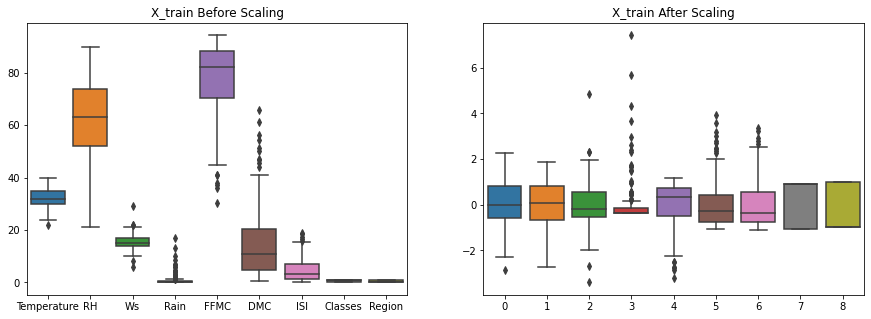

In [25]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error {mae}")
print(f"R2 Score {r2_score}")

Mean Absolute Error 0.5702771314172888
R2 Score 0.9860412217739589


## Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error {mae}")
print(f"R2 Score {r2_score}")

Mean Absolute Error 1.1577344845272435
R2 Score 0.9522146599134211


## Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error {mae}")
print(f"R2 Score {r2_score}")

Mean Absolute Error 0.573608780375476
R2 Score 0.9856180764584487


## ElasticNet Regression

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
y_pred = elasticnet.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print(f"Mean Absolute Error {mae}")
print(f"R2 Score {r2_score}")

Mean Absolute Error 1.7098193270120048
R2 Score 0.8979064487023043


In [30]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))